In [7]:
import requests
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
from matplotlib import pyplot as plt

In [8]:
url="https://computos2024.ine.mx/assets/mapas/nacional/distritos_min.geojson"

In [9]:
r = requests.get(url)
data= r.json()

In [10]:
data.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [11]:
coordenadas = []
propiedades = []

for feature in data['features']:
    geom_type = feature['geometry']['type']
    coords = feature['geometry']['coordinates']
    if geom_type == "Polygon":
        coordenadas.append(Polygon(coords[0]))
    elif geom_type == "MultiPolygon":
        multi_poly = [Polygon(poly[0]) for poly in coords]
        coordenadas.append(MultiPolygon(multi_poly))
    propiedades.append(feature['properties'])

gdf = gpd.GeoDataFrame(propiedades, geometry=coordenadas, crs="EPSG:4326")
#Ordenar por entidad y distrito
gdf = gdf.sort_values(by=['entidad', 'distrito'])
gdf

,entidad_distrito,id_circunscripcion,entidad,distrito,geometry
172,1_1,2,1,1,"MULTIPOLYGON (((-102.69040 21.73686, -102.6983..."
171,1_2,2,1,2,"MULTIPOLYGON (((-102.27804 21.87036, -102.2780..."
170,1_3,2,1,3,"MULTIPOLYGON (((-102.44626 21.66035, -102.4438..."
180,2_1,1,2,1,"MULTIPOLYGON (((-115.43996 32.61414, -115.4411..."
182,2_2,1,2,2,"MULTIPOLYGON (((-115.57389 32.61365, -115.5778..."
...,...,...,...,...,...
35,31_6,3,31,6,"MULTIPOLYGON (((-89.62582 20.92156, -89.62468 ..."
277,32_1,2,32,1,"MULTIPOLYGON (((-103.86205 22.17347, -103.8628..."
278,32_2,2,32,2,"MULTIPOLYGON (((-103.48453 21.14999, -103.4913..."
279,32_3,2,32,3,"MULTIPOLYGON (((-103.16188 23.70163, -103.1646..."


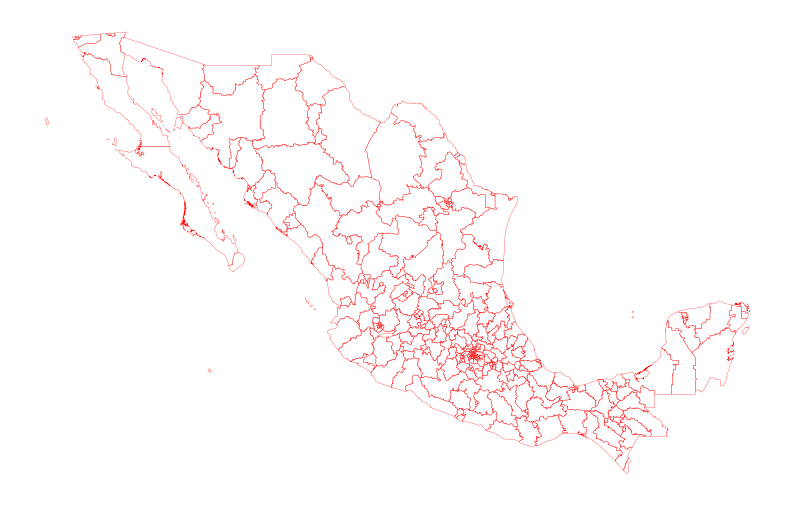

In [13]:
#Plot
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, color='white')
gdf.boundary.plot(ax=ax, color='red', linewidth=0.2)
#Sin ejes
ax.set_axis_off()